In [1]:
# Imports
from systems import syst_create_smti
from systems import get_S_imp
import kwant
from funcs import tun_con
import numpy as np
from funcs import calc_energies
from funcs import calc_densities
# import pandas as pd
import matplotlib.pyplot as plt
from funcs import get_default_params2
from systems import get_disorder

/Users/declanburke/opt/anaconda3/lib/python3.7/site-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
def plot_1d_wf(fsyst, L, W, dis, params, n_orb, n_states):
    densities=calc_densities(syst_create_smti(L, W, bool(dis)), params, n_orb, n_states)
    sitesx_list=np.array([site.pos[0] for site in fsyst.sites])
    sitesy_list=np.array([site.pos[1] for site in fsyst.sites])
    wfs1=[]
    wfs2=[]

    for x in range(len(sitesx_list)):
        wfs1.append(densities[x][0])
        wfs2.append(densities[x][1])

    WFS1=np.array(wfs1) 
    WFS2=np.array(wfs2) 
    WF=WFS1+WFS2
    WFplot=WF.reshape(int((L/10)+1), int((W/10)+1))
    wfplot=WFplot.mean(axis=1)
    plt.plot(np.linspace(0,1100,1101), wfplot)

In [7]:
# Generate params, create system, update params
params=get_default_params2()
fsyst=syst_create_smti(11000, 400, True)
params.update(disorder_imp=get_disorder(1, 35, 11000, 400, 100))
params.update(Smag_imp=0.03)

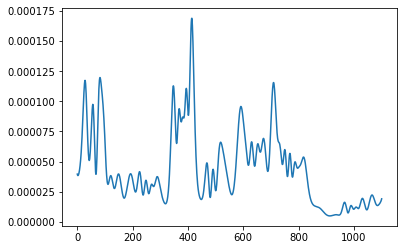

In [8]:
plot_1d_wf(fsyst, 11000, 400, True, params, 8, 4)